# Aula Prática: Fluxo em Redes

<sup>Adaptado do exercício 9.5-3 do livro `Introdução à Pesquisa Operacional` de `Hillier`.</sup>

## Exercício 1

### Descrição do problema

O diagrama abaixo representa um sistema de aquedutos que se origina em três rios (nós R1, R2 e R3) e termina em uma cidade importante (nó T), sendo os demais nós pontos de junção (transbordo) nesse sistema. Os arcos mostram as quantidades mínima e máxima de água que pode ser bombeada diariamente por meio de cada aqueduto.


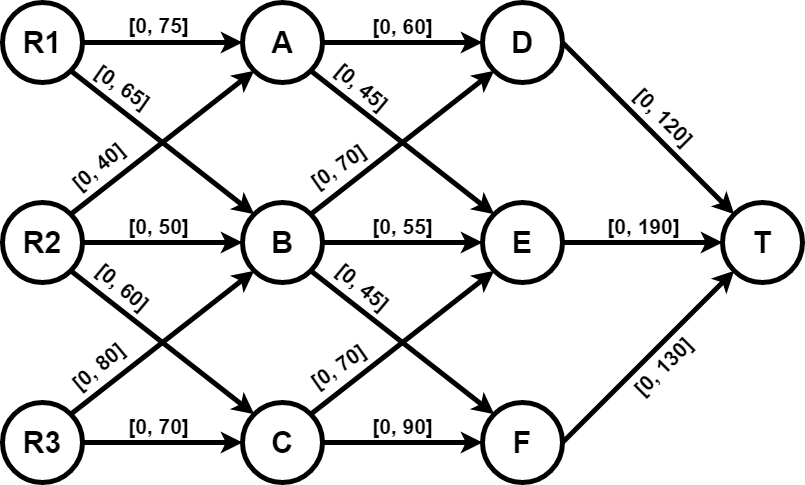

Inspire-se nos modelos de fluxo em redes estudados e crie um modelo para o problema e o implemente com o Python-MIP para determinar uma solução ótima.

### Resolução

In [ ]:
# instalação e importação do pacote mip
!pip install mip

from mip import *

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# funcões usadas posteriormente

# resolve o modelo e mostra os valores das variáveis na solução
def solve(model):
  status = model.optimize()

  print("Status = ", status)
  print(f"Solution value  = {model.objective_value:.2f}\n")
  
  print("Solution:")
  for v in model.vars:
      print(f"{v.name} = {v.x:.2f}")


# salva modelo em arquivo lp, e mostra o conteúdo
def save(model, filename):
  model.write(filename) # salva modelo em arquivo
  with open(filename, "r") as f: # lê e exibe conteúdo do arquivo
    print(f.read())

#### Carrega conjunto de arcos

In [ ]:
# arcos
A = {
    'R1': {'A', 'B', 'C'},
    'R2': {'A', 'B', 'C'},
    'R3': {'A', 'B', 'C'},
    'A': {'D', 'E', 'F'},
    'B': {'D', 'E', 'F'},
    'C': {'D', 'E', 'F'},
    'D': {'T'},
    'E': {'T'},
    'F': {'T'},
}

#### Cria Modelo

In [ ]:
# implementar modelo

model = Model(sense = MAXIMIZE, solver_name = CBC)

# criando as variaveis
x = {i: {j: model.add_var(var_type = CONTINUOUS, name = f"x_{i}_{j}", lb = 0.0) for j in v} for i, v in A.items()}

# criando as funcoes objetivo
model.objective = x['R1']['A'] + x['R1']['B'] + x['R2']['A'] + x['R2']['B'] + x['R2']['C'] + x['R3']['B'] + x['R3']['C']

# restricoes de maximo
model += x['R1']['A'] <= 75
model += x['R1']['B'] <= 65
model += x['R2']['A'] <= 40
model += x['R2']['B'] <= 50
model += x['R2']['C'] <= 60
model += x['R3']['B'] <= 80
model += x['R3']['C'] <= 70
model += x['A']['D'] <= 60
model += x['A']['E'] <= 45
model += x['B']['D'] <= 70
model += x['B']['E'] <= 55
model += x['B']['F'] <= 45
model += x['C']['E'] <= 70
model += x['C']['F'] <= 90
model += x['D']['T'] <= 120
model += x['E']['T'] <= 190
model += x['F']['T'] <= 130

# restricoes de conservacao de fluxo
model += x['R1']['A'] + x['R2']['A'] == x['A']['D'] + x['A']['E']
model += x['R1']['B'] + x['R2']['B'] + x['R3']['B'] == x['B']['D'] + x['B']['E'] + x['B']['F']
model += x['R2']['C'] + x['R3']['C'] == x['C']['E'] + x['C']['F']
model += x['A']['D'] + x['B']['D'] == x['D']['T']
model += x['A']['E'] + x['B']['E'] + x['C']['E'] == x['E']['T']
model += x['B']['F'] + x['C']['F'] == x['F']['T']

save(model, "modelo1.lp")

\Problem name: 

Minimize
OBJROW: - x_R1_A - x_R1_B - x_R2_A - x_R2_C - x_R2_B - x_R3_C - x_R3_B
Subject To
constr(0):  x_R1_A <= 75
constr(1):  x_R1_B <= 65
constr(2):  x_R2_A <= 40
constr(3):  x_R2_B <= 50
constr(4):  x_R2_C <= 60
constr(5):  x_R3_B <= 80
constr(6):  x_R3_C <= 70
constr(7):  x_A_D <= 60
constr(8):  x_A_E <= 45
constr(9):  x_B_D <= 70
constr(10):  x_B_E <= 55
constr(11):  x_B_F <= 45
constr(12):  x_C_E <= 70
constr(13):  x_C_F <= 90
constr(14):  x_D_T <= 120
constr(15):  x_E_T <= 190
constr(16):  x_F_T <= 130
constr(17):  x_R1_A + x_R2_A - x_A_E - x_A_D = -0
constr(18):  x_R1_B + x_R2_B + x_R3_B - x_B_E - x_B_D - x_B_F = -0
constr(19):  x_R2_C + x_R3_C - x_C_E - x_C_F = -0
constr(20):  x_A_D + x_B_D - x_D_T = -0
constr(21):  x_A_E + x_B_E + x_C_E - x_E_T = -0
constr(22):  x_B_F + x_C_F - x_F_T = -0
Bounds
End



#### Executa

In [ ]:
solve(model)

Status =  OptimizationStatus.OPTIMAL
Solution value  = 395.00

Solution:
x_R1_A = 75.00
x_R1_C = 0.00
x_R1_B = 65.00
x_R2_A = 20.00
x_R2_C = 60.00
x_R2_B = 50.00
x_R3_A = 0.00
x_R3_C = 70.00
x_R3_B = 55.00
x_A_E = 45.00
x_A_D = 50.00
x_A_F = 0.00
x_B_E = 55.00
x_B_D = 70.00
x_B_F = 45.00
x_C_E = 70.00
x_C_D = 0.00
x_C_F = 60.00
x_D_T = 120.00
x_E_T = 170.00
x_F_T = 105.00


## Exercício 2

### Descrição do problema

Implemente o modelo para o **Problema do Fluxo Máximo**. Tal problema é muito similar ao trabalhado no exercício anterior, com a exceção que haverá apenas um vértice de origem para o fluxo. A implementação deverá funcionar para uma rede qualquer que será fornecida através de um arquivo de texto.

Algumas instâncias de teste com as respectivas soluções ótimas podem ser baixadas [aqui](https://www.dropbox.com/sh/odbjhuvv9fh25dj/AADAXuQztX8q3-0ac8i-b0lna?dl=0).

Para referência, o formato do arquivo está detalhado abaixo. E o leitor já está implementado a seguir.

```
n # número de vértices (vértices numerados de 1 a n)
m # número de arcos (arcos numerados de 1 a m)
s # índice do vértice de origem
t # índice do vértice de destino
i j c_1 # vértices e capacidade do arco 1  
...
i j c_m # vértices e capacidade do arco m  
```



### Resolução

#### Criação de arquivo de teste

In [ ]:
with open("instance1.txt", "w") as f:
  f.write("""7
12
1
7
1 2 10
1 3 8
1 4 3
2 3 4
2 5 4
3 5 8
3 6 2
4 3 3
4 5 7
4 6 9
5 7 10
6 7 10
""")

####  Leitor de instâncias

In [ ]:
file_path = "instance1.txt"

f = open(file_path, "r")
n = int(f.readline())      # número de vértices (vértices numerados de 1 a n)
m = int(f.readline())      # número de arcos (arcos numerados de 1 a m)
source = int(f.readline()) # índice do vértice de origem
sink = int(f.readline())   # índice do vértice de destino
arcs = []
for i in range(m):
    i, j, cap = [int(val) for val in f.readline().split()]
    arcs.append((i, j, cap))

# exibe dados da instância
print(n, m, source, sink)
for arc in arcs:
   print(arc)

7 12 1 7
(1, 2, 10)
(1, 3, 8)
(1, 4, 3)
(2, 3, 4)
(2, 5, 4)
(3, 5, 8)
(3, 6, 2)
(4, 3, 3)
(4, 5, 7)
(4, 6, 9)
(5, 7, 10)
(6, 7, 10)


#### Cria modelo

In [ ]:
# implementar modelo

save(model, "modelo2.lp")

#### Executa

In [ ]:
solve(model)